In [25]:
import pandas as pd

In [26]:
df = pd.read_csv(r"C:\Juan Pablo\UVG\Trabajos\Ciclo 9\Aprendizaje estadístico\datos-proyecto\Datos_Tratados2.csv",  low_memory=True)
df

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Duracion,Mes,Dia,Dia_Semana
0,M,27,4457313,071,23,561,0,29.92,2024-10,1,Tuesday
1,M,29,5785761,254,23,031,0,6.65,2024-10,1,Tuesday
2,M,27,6661136,071,23,561,0,31.32,2024-10,1,Tuesday
3,M,51,5564174,008,23,144,0,13.77,2024-10,1,Tuesday
4,M,19,5208806,119,23,520,0,30.27,2024-10,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
11065710,M,24,2130284,288,23,331,23,11.48,2025-3,31,Monday
11065711,F,35,6762025,357,23,165,23,16.28,2025-3,31,Monday
11065712,O,21,3636883,450,23,448,23,22.10,2025-3,31,Monday
11065713,M,26,5405741,450,23,448,23,22.03,2025-3,31,Monday


In [27]:
# Unir columnas de mes y año de forma 24-1 o 25-1

In [28]:
# Verificar mes de abril
df[df["Mes"] == "2024-10"].head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Hora_Arribo,Duracion,Mes,Dia,Dia_Semana
0,M,27,4457313,071,23,561,0,29.92,2024-10,1,Tuesday
1,M,29,5785761,254,23,031,0,6.65,2024-10,1,Tuesday
2,M,27,6661136,071,23,561,0,31.32,2024-10,1,Tuesday
3,M,51,5564174,008,23,144,0,13.77,2024-10,1,Tuesday
4,M,19,5208806,119,23,520,0,30.27,2024-10,1,Tuesday


In [29]:
# Ciclo_Estacion_Retiro esta como string, por lo que debemos convertirla a int para poder comparar
# Notar que existen algunas columnas que estan como '271-272', tomar el primer valor
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].str.split('-').str[0]
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].astype(int)

In [30]:
# Ciclo_Estacion_Arribo esta como string, por lo que debemos convertirla a int para poder comparar
# Notar que existen algunas columnas que estan como '271-272', tomar el primer valor
# Asegurarnos de que los valores sean cadenas y dividir por el guion
df['Ciclo_EstacionArribo'] = df['Ciclo_EstacionArribo'].astype(str).str.split('-').str[0]
df['Ciclo_EstacionArribo'] = df['Ciclo_EstacionArribo'].astype(int)

In [31]:
# Crear nuevo DataFrame con las ESTACIONES como filas. Para eso debemos obtener la lista de ESTACIONES mediante la columna Ciclo_Estacion_Retiro
estaciones = df['Ciclo_Estacion_Retiro'].unique()

In [32]:
# Crear nuevo DataFrame con las ESTACIONES como filas. Para eso debemos obtener la lista de ESTACIONES mediante la columna Ciclo_Estacion_Retiro
estaciones = pd.DataFrame(estaciones, columns=['Estacion'])
estaciones['Estacion'] = estaciones['Estacion'].astype(int)

In [33]:
# Calcular distribucion de genero por estación de retiro: 
df_M = df[df['Genero_Usuario'] == 'M']
df_F = df[df['Genero_Usuario'] == 'F']
df_O = df[df['Genero_Usuario'] == 'O']
# Agregar columnas en un mismo dataframe
df_genero = df_M.groupby(['Ciclo_Estacion_Retiro']).size().reset_index(name='M')
df_genero['F'] = df_F.groupby(['Ciclo_Estacion_Retiro']).size().reset_index(name='F')['F']
df_genero['O'] = df_O.groupby(['Ciclo_Estacion_Retiro']).size().reset_index(name='O')['O']
df_genero = df_genero.fillna(0)
  
# Dividir entre cantidad de meses en el dataframe, estos son 6 meses (octubre-2024-marzo 2025)
df_genero['M'] = df_genero['M'] / 6
df_genero['F'] = df_genero['F'] / 6
df_genero['O'] = df_genero['O'] / 6
df_genero = df_genero.round(2) 

df_genero

,Ciclo_Estacion_Retiro,M,F,O
0,1,5551.50,2070.17,95.50
1,2,2371.17,851.00,31.50
2,3,2618.17,1044.33,61.67
3,4,3068.33,1221.17,40.00
4,5,3476.33,1268.17,79.67
...,...,...,...,...
673,708,733.83,259.33,9.67
674,709,1177.33,432.67,26.33
675,710,2251.33,1130.50,73.00
676,711,2151.83,860.33,68.50


In [34]:
# Agregar a DataFrame de estaciones la distribucion de genero en forma de diccionario
estaciones['Genero_retiro'] = estaciones['Estacion'].map(df_genero.set_index('Ciclo_Estacion_Retiro').T.to_dict('list'))
estaciones['Genero_retiro'] = estaciones['Genero_retiro'].apply(lambda x: {'M': x[0], 'F': x[1], 'O': x[2]})

estaciones.head(10)

,Estacion,Genero_retiro
0,71,"{'M': 2302.33, 'F': 1202.33, 'O': 56.17}"
1,254,"{'M': 1826.67, 'F': 821.67, 'O': 52.33}"
2,8,"{'M': 2060.5, 'F': 854.67, 'O': 40.5}"
3,119,"{'M': 3357.5, 'F': 1245.5, 'O': 165.5}"
4,452,"{'M': 1108.5, 'F': 427.5, 'O': 26.83}"
5,638,"{'M': 1790.33, 'F': 624.33, 'O': 57.0}"
6,3,"{'M': 2618.17, 'F': 1044.33, 'O': 61.67}"
7,369,"{'M': 2393.33, 'F': 1226.33, 'O': 111.5}"
8,295,"{'M': 2227.17, 'F': 907.0, 'O': 56.5}"
9,615,"{'M': 1165.67, 'F': 562.67, 'O': 41.67}"


In [35]:
# Calcular distribucion de genero por estación de retiro: 
df_M = df[df['Genero_Usuario'] == 'M']
df_F = df[df['Genero_Usuario'] == 'F']
df_O = df[df['Genero_Usuario'] == 'O']
# Agregar columnas en un mismo dataframe
df_genero = df_M.groupby(['Ciclo_EstacionArribo']).size().reset_index(name='M')
df_genero['F'] = df_F.groupby(['Ciclo_EstacionArribo']).size().reset_index(name='F')['F']
df_genero['O'] = df_O.groupby(['Ciclo_EstacionArribo']).size().reset_index(name='O')['O']
df_genero = df_genero.fillna(0)
  
# Dividir entre cantidad de meses en el dataframe, estos son 6 meses (2024-marzo 2025)
df_genero['M'] = df_genero['M'] / 6
df_genero['F'] = df_genero['F'] / 6
df_genero['O'] = df_genero['O'] / 6
df_genero = df_genero.round(2) 

# Agregar a DataFrame de estaciones la distribucion de genero en forma de diccionario
estaciones['Genero_arribo'] = estaciones['Estacion'].map(df_genero.set_index('Ciclo_EstacionArribo').T.to_dict('list'))
estaciones['Genero_arribo'] = estaciones['Genero_arribo'].apply(lambda x: {'M': x[0], 'F': x[1], 'O': x[2]})

In [36]:
# Suma de generos de retiro y arribo
estaciones['genero_x_mes'] = estaciones['Genero_arribo'].combine(estaciones['Genero_retiro'], lambda x, y: {k: round(x.get(k, 0) + y.get(k, 0), 2) for k in x | y})
estaciones.drop(columns=['Genero_retiro', 'Genero_arribo'], inplace=True)


In [37]:
# Calcular distribución de edad por estación de retiro y arribo
df_20 = df[df['Edad_Usuario'] < 20]
df_30 = df[(df['Edad_Usuario'] < 30) & (df['Edad_Usuario'] >= 20)]
df_40 = df[(df['Edad_Usuario'] < 40) & (df['Edad_Usuario'] >= 30)]
df_50 = df[(df['Edad_Usuario'] < 50) & (df['Edad_Usuario'] >= 40)]
df_60 = df[(df['Edad_Usuario'] < 60) & (df['Edad_Usuario'] >= 50)]
df_70 = df[(df['Edad_Usuario'] < 70) & (df['Edad_Usuario'] >= 60)]
df_100 = df[df['Edad_Usuario'] >= 70]

# Crear un índice completo de todas las estaciones
estaciones_completas = pd.Index(df['Ciclo_Estacion_Retiro'].unique()).union(df['Ciclo_EstacionArribo'].unique())

# Agregar columnas en un mismo DataFrame
df_edad = pd.DataFrame(index=estaciones_completas)  # Usar todas las estaciones como índice
df_edad['<20'] = df_20.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
df_edad['20-30'] = df_30.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
df_edad['30-40'] = df_40.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
df_edad['40-50'] = df_50.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
df_edad['50-60'] = df_60.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
df_edad['60-70'] = df_70.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
df_edad['70<'] = df_100.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)

# Sumar las edades de arribo
df_edad['<20'] += df_20.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
df_edad['20-30'] += df_30.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
df_edad['30-40'] += df_40.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
df_edad['40-50'] += df_50.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
df_edad['50-60'] += df_60.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
df_edad['60-70'] += df_70.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
df_edad['70<'] += df_100.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)

# Dividir entre cantidad de meses en el dataframe, estos son 6 meses (2024-marzo 2025)
df_edad['<20'] = df_edad['<20'] / 6
df_edad['20-30'] = df_edad['20-30'] / 6
df_edad['30-40'] = df_edad['30-40'] / 6
df_edad['40-50'] = df_edad['40-50'] / 6
df_edad['50-60'] = df_edad['50-60'] / 6
df_edad['60-70'] = df_edad['60-70'] / 6
df_edad['70<'] = df_edad['70<'] / 6
df_edad = df_edad.round(2)

df_edad


,<20,20-30,30-40,40-50,50-60,60-70,70<
1,181.50,4719.00,6119.50,2841.83,1323.67,284.83,249.33
2,30.67,1990.00,2827.83,1195.67,399.33,110.00,27.67
3,140.00,3195.83,2451.83,858.33,346.33,153.83,57.33
4,59.67,2939.67,3839.33,1376.17,469.67,167.83,22.00
5,77.50,3182.67,4070.33,1411.83,601.50,207.83,18.67
...,...,...,...,...,...,...,...
708,13.83,743.33,903.83,385.83,200.50,24.67,3.17
709,87.50,1552.00,1259.50,483.17,215.17,42.50,4.67
710,118.17,2393.67,2209.83,884.67,395.00,163.00,26.00
711,115.33,1848.83,1755.00,783.50,341.50,74.67,12.33


In [38]:
# Agregar a DataFrame de estaciones la distribucion de edad en forma de diccionario
estaciones['edad_x_mes'] = estaciones['Estacion'].map(df_edad.T.to_dict('list'))
estaciones['edad_x_mes'] = estaciones['edad_x_mes'].apply(lambda x: {'<20': x[0], '20-30': x[1], '30-40': x[2], '40-50': x[3], '50-60': x[4], '60-70': x[5], '70<': x[6]})

In [39]:
# Hacer lo mismo que hemos hecho pero con distribucion de dias de la semana. Si puede hacerse en un ciclo reducido mejor. 
# Usaremos la columna de DiaSemana, que tiene los nombres de los dias
duraciones = ["0-10", "10-20", "20-30", "30-45", "45+"]
minimos = [0, 10, 20, 30, 45]
maximos = [10, 20, 30, 45, 10000]

df_duracion = pd.DataFrame(index=estaciones_completas)  # Usar todas las estaciones como índice

# Crear for 
for dur, min_v, max_v in zip(duraciones, minimos, maximos):
    # Filtrar por duracion
    df_duracion[dur] = df[(df['Duracion'] >= min_v) & (df['Duracion'] < max_v)].groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
    # Sumar las duraciones de arribo
    df_duracion[dur] += df[(df['Duracion'] >= min_v) & (df['Duracion'] < max_v)].groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
    # Dividir entre cantidad de meses en el dataframe, estos son 6 meses (2024-marzo 2025)
    df_duracion[dur] = df_duracion[dur] / 6
    # Redondear a 2 decimales
    df_duracion[dur] = df_duracion[dur].round(2)

# Agregar a DataFrame de estaciones la distribucion de dias de la semana en forma de diccionario
estaciones['duraciones_x_mes'] = estaciones['Estacion'].map(df_duracion.T.to_dict('list'))
estaciones['duraciones_x_mes'] = estaciones['duraciones_x_mes'].apply(lambda x: {dur: x[i] for i, dur in enumerate(duraciones)})

estaciones.head(10)

,Estacion,genero_x_mes,edad_x_mes,duraciones_x_mes
0,71,"{'M': 4630.0, 'F': 2362.33, 'O': 122.17}","{'<20': 39.83, '20-30': 2364.83, '30-40': 2827...","{'0-10': 3792.0, '10-20': 1969.17, '20-30': 80..."
1,254,"{'M': 3504.0, 'F': 1578.67, 'O': 108.5}","{'<20': 37.17, '20-30': 1876.83, '30-40': 1988...","{'0-10': 2398.0, '10-20': 1764.0, '20-30': 655..."
2,8,"{'M': 4127.5, 'F': 1700.17, 'O': 73.17}","{'<20': 84.67, '20-30': 1942.0, '30-40': 2170....","{'0-10': 2216.33, '10-20': 1954.83, '20-30': 8..."
3,119,"{'M': 6812.33, 'F': 2584.83, 'O': 338.0}","{'<20': 84.17, '20-30': 2951.83, '30-40': 4184...","{'0-10': 4627.0, '10-20': 3303.5, '20-30': 114..."
4,452,"{'M': 2189.17, 'F': 839.0, 'O': 62.0}","{'<20': 18.17, '20-30': 1070.0, '30-40': 1282....","{'0-10': 1272.83, '10-20': 1059.33, '20-30': 4..."
5,638,"{'M': 3568.16, 'F': 1249.0, 'O': 141.5}","{'<20': 60.33, '20-30': 1836.33, '30-40': 1920...","{'0-10': 2883.0, '10-20': 1239.33, '20-30': 48..."
6,3,"{'M': 5133.17, 'F': 1948.0, 'O': 122.34}","{'<20': 140.0, '20-30': 3195.83, '30-40': 2451...","{'0-10': 2733.0, '10-20': 2360.0, '20-30': 947..."
7,369,"{'M': 4956.0, 'F': 2342.16, 'O': 200.0}","{'<20': 81.83, '20-30': 2782.33, '30-40': 2849...","{'0-10': 3718.83, '10-20': 1991.5, '20-30': 93..."
8,295,"{'M': 4422.5, 'F': 1707.5, 'O': 142.83}","{'<20': 64.0, '20-30': 2378.67, '30-40': 2484....","{'0-10': 3709.33, '10-20': 1570.0, '20-30': 63..."
9,615,"{'M': 2370.17, 'F': 1107.5, 'O': 75.84}","{'<20': 27.83, '20-30': 1243.33, '30-40': 1446...","{'0-10': 1213.33, '10-20': 1440.83, '20-30': 6..."


In [40]:
# Hacer lo mismo que hemos hecho pero con distribucion de dias de la semana. Si puede hacerse en un ciclo reducido mejor. 
# Usaremos la columna de DiaSemana, que tiene los nombres de los dias
days_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_dia = pd.DataFrame(index=estaciones_completas)  # Usar todas las estaciones como índice

# Crear for 
for dia in days_week:
    # Filtrar por dia de la semana
    df_dia[dia] = df[df['Dia_Semana'] == dia].groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
    # Sumar los dias de arribo
    df_dia[dia] += df[df['Dia_Semana'] == dia].groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
    # Dividir entre cantidad de meses en el dataframe, estos son 6 meses (2024-marzo 2025)
    df_dia[dia] = df_dia[dia] / 6
    df_dia[dia] = df_dia[dia].round(2)

# Agregar a DataFrame de estaciones la distribucion de dias de la semana en forma de diccionario
estaciones['dias_x_mes'] = estaciones['Estacion'].map(df_dia.T.to_dict('list'))
estaciones['dias_x_mes'] = estaciones['dias_x_mes'].apply(lambda x: {'Monday': x[0], 'Tuesday': x[1], 'Wednesday': x[2], 'Thursday': x[3], 'Friday': x[4], 'Saturday': x[5], 'Sunday': x[6]})  

estaciones.head(10)	
    

,Estacion,genero_x_mes,edad_x_mes,duraciones_x_mes,dias_x_mes
0,71,"{'M': 4630.0, 'F': 2362.33, 'O': 122.17}","{'<20': 39.83, '20-30': 2364.83, '30-40': 2827...","{'0-10': 3792.0, '10-20': 1969.17, '20-30': 80...","{'Monday': 1084.5, 'Tuesday': 1155.17, 'Wednes..."
1,254,"{'M': 3504.0, 'F': 1578.67, 'O': 108.5}","{'<20': 37.17, '20-30': 1876.83, '30-40': 1988...","{'0-10': 2398.0, '10-20': 1764.0, '20-30': 655...","{'Monday': 788.17, 'Tuesday': 869.5, 'Wednesda..."
2,8,"{'M': 4127.5, 'F': 1700.17, 'O': 73.17}","{'<20': 84.67, '20-30': 1942.0, '30-40': 2170....","{'0-10': 2216.33, '10-20': 1954.83, '20-30': 8...","{'Monday': 819.33, 'Tuesday': 889.17, 'Wednesd..."
3,119,"{'M': 6812.33, 'F': 2584.83, 'O': 338.0}","{'<20': 84.17, '20-30': 2951.83, '30-40': 4184...","{'0-10': 4627.0, '10-20': 3303.5, '20-30': 114...","{'Monday': 1418.83, 'Tuesday': 1551.83, 'Wedne..."
4,452,"{'M': 2189.17, 'F': 839.0, 'O': 62.0}","{'<20': 18.17, '20-30': 1070.0, '30-40': 1282....","{'0-10': 1272.83, '10-20': 1059.33, '20-30': 4...","{'Monday': 499.0, 'Tuesday': 568.0, 'Wednesday..."
5,638,"{'M': 3568.16, 'F': 1249.0, 'O': 141.5}","{'<20': 60.33, '20-30': 1836.33, '30-40': 1920...","{'0-10': 2883.0, '10-20': 1239.33, '20-30': 48...","{'Monday': 711.17, 'Tuesday': 797.0, 'Wednesda..."
6,3,"{'M': 5133.17, 'F': 1948.0, 'O': 122.34}","{'<20': 140.0, '20-30': 3195.83, '30-40': 2451...","{'0-10': 2733.0, '10-20': 2360.0, '20-30': 947...","{'Monday': 1001.67, 'Tuesday': 1098.33, 'Wedne..."
7,369,"{'M': 4956.0, 'F': 2342.16, 'O': 200.0}","{'<20': 81.83, '20-30': 2782.33, '30-40': 2849...","{'0-10': 3718.83, '10-20': 1991.5, '20-30': 93...","{'Monday': 1150.33, 'Tuesday': 1210.17, 'Wedne..."
8,295,"{'M': 4422.5, 'F': 1707.5, 'O': 142.83}","{'<20': 64.0, '20-30': 2378.67, '30-40': 2484....","{'0-10': 3709.33, '10-20': 1570.0, '20-30': 63...","{'Monday': 945.83, 'Tuesday': 1048.5, 'Wednesd..."
9,615,"{'M': 2370.17, 'F': 1107.5, 'O': 75.84}","{'<20': 27.83, '20-30': 1243.33, '30-40': 1446...","{'0-10': 1213.33, '10-20': 1440.83, '20-30': 6...","{'Monday': 504.83, 'Tuesday': 548.67, 'Wednesd..."


In [41]:
# Obtener distribucion de horas de arribo y retiro por mes
horas = [x for x in range(24)]

df_hora = pd.DataFrame(index=estaciones_completas)  # Usar todas las estaciones como índice

for hora in horas:
    # Filtrar por hora de la semana
    df_hora[hora] = df[df['Hora_Retiro'] == hora].groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
    # Sumar las horas de arribo
    df_hora[hora] += df[df['Hora_Arribo'] == hora].groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)
    # Dividir entre cantidad de meses en el dataframe, estos son 6 meses (2024-marzo 2025)
    df_hora[hora] = df_hora[hora] / 6
    df_hora[hora] = df_hora[hora].round(2)

# Agregar a DataFrame de estaciones la distribucion de horas en forma de diccionario
estaciones['horas_x_mes'] = estaciones['Estacion'].map(df_hora.T.to_dict('list'))
estaciones['horas_x_mes'] = estaciones['horas_x_mes'].apply(lambda x: {k: x[k] for k in horas})
estaciones.head(10)

,Estacion,genero_x_mes,edad_x_mes,duraciones_x_mes,dias_x_mes,horas_x_mes
0,71,"{'M': 4630.0, 'F': 2362.33, 'O': 122.17}","{'<20': 39.83, '20-30': 2364.83, '30-40': 2827...","{'0-10': 3792.0, '10-20': 1969.17, '20-30': 80...","{'Monday': 1084.5, 'Tuesday': 1155.17, 'Wednes...","{0: 19.5, 1: 1.67, 2: 0.0, 3: 0.0, 4: 0.33, 5:..."
1,254,"{'M': 3504.0, 'F': 1578.67, 'O': 108.5}","{'<20': 37.17, '20-30': 1876.83, '30-40': 1988...","{'0-10': 2398.0, '10-20': 1764.0, '20-30': 655...","{'Monday': 788.17, 'Tuesday': 869.5, 'Wednesda...","{0: 39.0, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5: ..."
2,8,"{'M': 4127.5, 'F': 1700.17, 'O': 73.17}","{'<20': 84.67, '20-30': 1942.0, '30-40': 2170....","{'0-10': 2216.33, '10-20': 1954.83, '20-30': 8...","{'Monday': 819.33, 'Tuesday': 889.17, 'Wednesd...","{0: 28.33, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5:..."
3,119,"{'M': 6812.33, 'F': 2584.83, 'O': 338.0}","{'<20': 84.17, '20-30': 2951.83, '30-40': 4184...","{'0-10': 4627.0, '10-20': 3303.5, '20-30': 114...","{'Monday': 1418.83, 'Tuesday': 1551.83, 'Wedne...","{0: 102.83, 1: 1.5, 2: 0.17, 3: 0.0, 4: 0.0, 5..."
4,452,"{'M': 2189.17, 'F': 839.0, 'O': 62.0}","{'<20': 18.17, '20-30': 1070.0, '30-40': 1282....","{'0-10': 1272.83, '10-20': 1059.33, '20-30': 4...","{'Monday': 499.0, 'Tuesday': 568.0, 'Wednesday...","{0: 5.33, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 1..."
5,638,"{'M': 3568.16, 'F': 1249.0, 'O': 141.5}","{'<20': 60.33, '20-30': 1836.33, '30-40': 1920...","{'0-10': 2883.0, '10-20': 1239.33, '20-30': 48...","{'Monday': 711.17, 'Tuesday': 797.0, 'Wednesda...","{0: 25.83, 1: 0.17, 2: 0.0, 3: 0.0, 4: 0.0, 5:..."
6,3,"{'M': 5133.17, 'F': 1948.0, 'O': 122.34}","{'<20': 140.0, '20-30': 3195.83, '30-40': 2451...","{'0-10': 2733.0, '10-20': 2360.0, '20-30': 947...","{'Monday': 1001.67, 'Tuesday': 1098.33, 'Wedne...","{0: 54.33, 1: 1.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ..."
7,369,"{'M': 4956.0, 'F': 2342.16, 'O': 200.0}","{'<20': 81.83, '20-30': 2782.33, '30-40': 2849...","{'0-10': 3718.83, '10-20': 1991.5, '20-30': 93...","{'Monday': 1150.33, 'Tuesday': 1210.17, 'Wedne...","{0: 23.17, 1: 0.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ..."
8,295,"{'M': 4422.5, 'F': 1707.5, 'O': 142.83}","{'<20': 64.0, '20-30': 2378.67, '30-40': 2484....","{'0-10': 3709.33, '10-20': 1570.0, '20-30': 63...","{'Monday': 945.83, 'Tuesday': 1048.5, 'Wednesd...","{0: 35.83, 1: 1.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ..."
9,615,"{'M': 2370.17, 'F': 1107.5, 'O': 75.84}","{'<20': 27.83, '20-30': 1243.33, '30-40': 1446...","{'0-10': 1213.33, '10-20': 1440.83, '20-30': 6...","{'Monday': 504.83, 'Tuesday': 548.67, 'Wednesd...","{0: 27.17, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5:..."


In [42]:
# Agregar distribucion de total de viajes por mes del año
meses = ['2024-10', '2024-11', '2024-12','2025-1', '2025-2', '2025-3']

df_meses = pd.DataFrame(index=estaciones_completas)  # Usar todas las estaciones como índice

for mes in meses:
    # Filtrar por mes
    df_meses[mes] = df[df['Mes'] == mes].groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0)
    # Sumar los meses de arribo
    df_meses[mes] += df[df['Mes'] == mes].groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0)

estaciones['viajes_x_mes'] = estaciones['Estacion'].map(df_meses.T.to_dict('list'))
estaciones['viajes_x_mes'] = estaciones['viajes_x_mes'].apply(lambda x: {mes: x[i] for i, mes in enumerate(meses)})
estaciones

,Estacion,genero_x_mes,edad_x_mes,duraciones_x_mes,dias_x_mes,horas_x_mes,viajes_x_mes
0,71,"{'M': 4630.0, 'F': 2362.33, 'O': 122.17}","{'<20': 39.83, '20-30': 2364.83, '30-40': 2827...","{'0-10': 3792.0, '10-20': 1969.17, '20-30': 80...","{'Monday': 1084.5, 'Tuesday': 1155.17, 'Wednes...","{0: 19.5, 1: 1.67, 2: 0.0, 3: 0.0, 4: 0.33, 5:...","{'2024-10': 7596, '2024-11': 7697, '2024-12': ..."
1,254,"{'M': 3504.0, 'F': 1578.67, 'O': 108.5}","{'<20': 37.17, '20-30': 1876.83, '30-40': 1988...","{'0-10': 2398.0, '10-20': 1764.0, '20-30': 655...","{'Monday': 788.17, 'Tuesday': 869.5, 'Wednesda...","{0: 39.0, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 5823, '2024-11': 5479, '2024-12': ..."
2,8,"{'M': 4127.5, 'F': 1700.17, 'O': 73.17}","{'<20': 84.67, '20-30': 1942.0, '30-40': 2170....","{'0-10': 2216.33, '10-20': 1954.83, '20-30': 8...","{'Monday': 819.33, 'Tuesday': 889.17, 'Wednesd...","{0: 28.33, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5:...","{'2024-10': 7093, '2024-11': 6254, '2024-12': ..."
3,119,"{'M': 6812.33, 'F': 2584.83, 'O': 338.0}","{'<20': 84.17, '20-30': 2951.83, '30-40': 4184...","{'0-10': 4627.0, '10-20': 3303.5, '20-30': 114...","{'Monday': 1418.83, 'Tuesday': 1551.83, 'Wedne...","{0: 102.83, 1: 1.5, 2: 0.17, 3: 0.0, 4: 0.0, 5...","{'2024-10': 10861, '2024-11': 10233, '2024-12'..."
4,452,"{'M': 2189.17, 'F': 839.0, 'O': 62.0}","{'<20': 18.17, '20-30': 1070.0, '30-40': 1282....","{'0-10': 1272.83, '10-20': 1059.33, '20-30': 4...","{'Monday': 499.0, 'Tuesday': 568.0, 'Wednesday...","{0: 5.33, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 1...","{'2024-10': 3554, '2024-11': 3224, '2024-12': ..."
...,...,...,...,...,...,...,...
673,100,"{'M': 2004.17, 'F': 920.17, 'O': 60.17}","{'<20': 22.67, '20-30': 1025.33, '30-40': 1095...","{'0-10': 754.0, '10-20': 1005.17, '20-30': 673...","{'Monday': 433.67, 'Tuesday': 449.0, 'Wednesda...","{0: 13.0, 1: 0.5, 2: 0.0, 3: 0.0, 4: 0.17, 5: ...","{'2024-10': 3281, '2024-11': 3309, '2024-12': ..."
674,361,"{'M': 1568.67, 'F': 602.83, 'O': 144.17}","{'<20': 41.67, '20-30': 689.17, '30-40': 900.8...","{'0-10': 1037.83, '10-20': 747.5, '20-30': 347...","{'Monday': 379.17, 'Tuesday': 412.33, 'Wednesd...","{0: 9.5, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 9....","{'2024-10': 2389, '2024-11': 2623, '2024-12': ..."
675,442,"{'M': 1744.17, 'F': 658.67, 'O': 74.5}","{'<20': 21.83, '20-30': 905.67, '30-40': 910.8...","{'0-10': 856.83, '10-20': 983.83, '20-30': 379...","{'Monday': 326.67, 'Tuesday': 349.5, 'Wednesda...","{0: 5.0, 1: 0.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: 1....","{'2024-10': 2567, '2024-11': 2610, '2024-12': ..."
676,90,"{'M': 2164.33, 'F': 898.0, 'O': 55.83}","{'<20': 40.0, '20-30': 956.33, '30-40': 1041.6...","{'0-10': 687.0, '10-20': 891.83, '20-30': 766....","{'Monday': 459.5, 'Tuesday': 419.0, 'Wednesday...","{0: 8.5, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 7....","{'2024-10': 3285, '2024-11': 3330, '2024-12': ..."


In [43]:
# Agregar a DataFrame de estaciones los viajes totales de arribos y retiros
estaciones["retiros_x_mes"] = df.groupby(['Ciclo_Estacion_Retiro']).size().reindex(estaciones_completas, fill_value=0) / 6
estaciones["arribos_x_mes"] = df.groupby(['Ciclo_EstacionArribo']).size().reindex(estaciones_completas, fill_value=0) / 6
estaciones["retiros_x_mes"] = estaciones["retiros_x_mes"].round(2)
estaciones["arribos_x_mes"] = estaciones["arribos_x_mes"].round(2)
estaciones.head(10)

,Estacion,genero_x_mes,edad_x_mes,duraciones_x_mes,dias_x_mes,horas_x_mes,viajes_x_mes,retiros_x_mes,arribos_x_mes
0,71,"{'M': 4630.0, 'F': 2362.33, 'O': 122.17}","{'<20': 39.83, '20-30': 2364.83, '30-40': 2827...","{'0-10': 3792.0, '10-20': 1969.17, '20-30': 80...","{'Monday': 1084.5, 'Tuesday': 1155.17, 'Wednes...","{0: 19.5, 1: 1.67, 2: 0.0, 3: 0.0, 4: 0.33, 5:...","{'2024-10': 7596, '2024-11': 7697, '2024-12': ...",NaN,NaN
1,254,"{'M': 3504.0, 'F': 1578.67, 'O': 108.5}","{'<20': 37.17, '20-30': 1876.83, '30-40': 1988...","{'0-10': 2398.0, '10-20': 1764.0, '20-30': 655...","{'Monday': 788.17, 'Tuesday': 869.5, 'Wednesda...","{0: 39.0, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 5823, '2024-11': 5479, '2024-12': ...",7717.17,8002.50
2,8,"{'M': 4127.5, 'F': 1700.17, 'O': 73.17}","{'<20': 84.67, '20-30': 1942.0, '30-40': 2170....","{'0-10': 2216.33, '10-20': 1954.83, '20-30': 8...","{'Monday': 819.33, 'Tuesday': 889.17, 'Wednesd...","{0: 28.33, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5:...","{'2024-10': 7093, '2024-11': 6254, '2024-12': ...",3253.67,3327.50
3,119,"{'M': 6812.33, 'F': 2584.83, 'O': 338.0}","{'<20': 84.17, '20-30': 2951.83, '30-40': 4184...","{'0-10': 4627.0, '10-20': 3303.5, '20-30': 114...","{'Monday': 1418.83, 'Tuesday': 1551.83, 'Wedne...","{0: 102.83, 1: 1.5, 2: 0.17, 3: 0.0, 4: 0.0, 5...","{'2024-10': 10861, '2024-11': 10233, '2024-12'...",3724.17,3479.33
4,452,"{'M': 2189.17, 'F': 839.0, 'O': 62.0}","{'<20': 18.17, '20-30': 1070.0, '30-40': 1282....","{'0-10': 1272.83, '10-20': 1059.33, '20-30': 4...","{'Monday': 499.0, 'Tuesday': 568.0, 'Wednesday...","{0: 5.33, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 1...","{'2024-10': 3554, '2024-11': 3224, '2024-12': ...",4329.50,4544.83
5,638,"{'M': 3568.16, 'F': 1249.0, 'O': 141.5}","{'<20': 60.33, '20-30': 1836.33, '30-40': 1920...","{'0-10': 2883.0, '10-20': 1239.33, '20-30': 48...","{'Monday': 711.17, 'Tuesday': 797.0, 'Wednesda...","{0: 25.83, 1: 0.17, 2: 0.0, 3: 0.0, 4: 0.0, 5:...","{'2024-10': 5549, '2024-11': 5246, '2024-12': ...",4824.17,4746.17
6,3,"{'M': 5133.17, 'F': 1948.0, 'O': 122.34}","{'<20': 140.0, '20-30': 3195.83, '30-40': 2451...","{'0-10': 2733.0, '10-20': 2360.0, '20-30': 947...","{'Monday': 1001.67, 'Tuesday': 1098.33, 'Wedne...","{0: 54.33, 1: 1.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 7802, '2024-11': 7620, '2024-12': ...",4748.67,4741.17
7,369,"{'M': 4956.0, 'F': 2342.16, 'O': 200.0}","{'<20': 81.83, '20-30': 2782.33, '30-40': 2849...","{'0-10': 3718.83, '10-20': 1991.5, '20-30': 93...","{'Monday': 1150.33, 'Tuesday': 1210.17, 'Wedne...","{0: 23.17, 1: 0.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 8386, '2024-11': 7994, '2024-12': ...",6775.83,6709.83
8,295,"{'M': 4422.5, 'F': 1707.5, 'O': 142.83}","{'<20': 64.0, '20-30': 2378.67, '30-40': 2484....","{'0-10': 3709.33, '10-20': 1570.0, '20-30': 63...","{'Monday': 945.83, 'Tuesday': 1048.5, 'Wednesd...","{0: 35.83, 1: 1.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 6794, '2024-11': 6571, '2024-12': ...",2955.67,2945.17
9,615,"{'M': 2370.17, 'F': 1107.5, 'O': 75.84}","{'<20': 27.83, '20-30': 1243.33, '30-40': 1446...","{'0-10': 1213.33, '10-20': 1440.83, '20-30': 6...","{'Monday': 504.83, 'Tuesday': 548.67, 'Wednesd...","{0: 27.17, 1: 0.33, 2: 0.0, 3: 0.0, 4: 0.0, 5:...","{'2024-10': 3855, '2024-11': 3730, '2024-12': ...",3236.67,3132.67


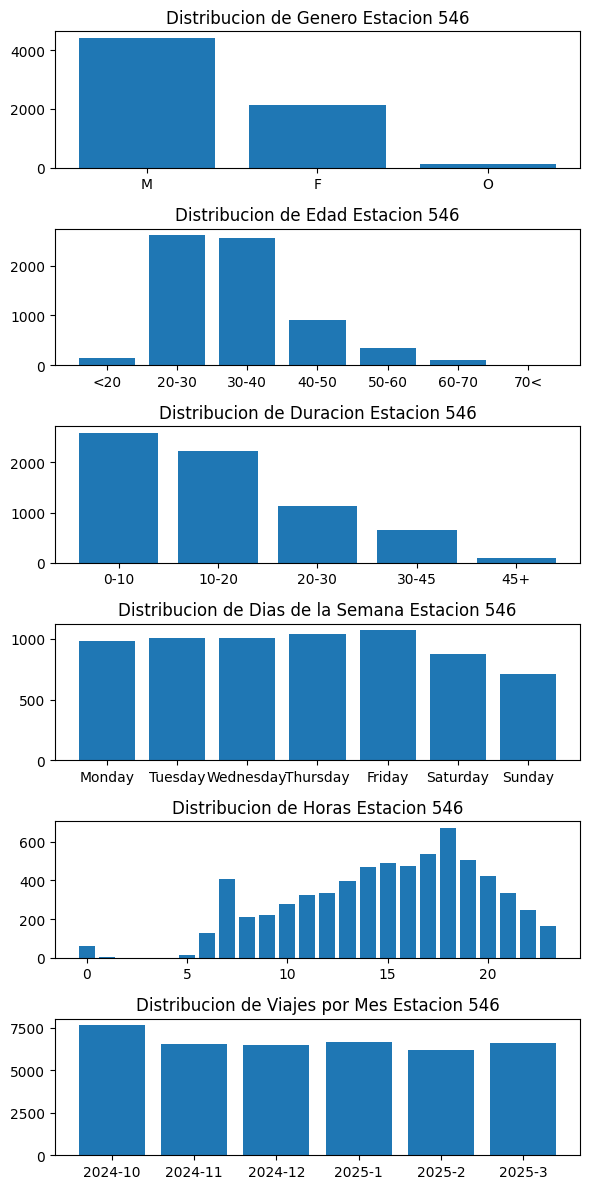

In [55]:
# Plots de todas las distribuciones de la estacion 1 en subplots. Es decir, genero, edad, duraciones, dias de la semana, y horas 
import matplotlib.pyplot as plt

n = 546
estacion_1 = estaciones[estaciones['Estacion'] == n]

plt.figure(figsize=(6, 12))

# Distribución de Género
plt.subplot(6, 1, 1)
plt.title(f'Distribucion de Genero Estacion {n}')
plt.bar(estacion_1['genero_x_mes'].values[0].keys(), estacion_1['genero_x_mes'].values[0].values())

# Distribución de Edad
plt.subplot(6, 1, 2)
plt.title(f'Distribucion de Edad Estacion {n}')
plt.bar(estacion_1['edad_x_mes'].values[0].keys(), estacion_1['edad_x_mes'].values[0].values())

# Distribución de Duración
plt.subplot(6, 1, 3)
plt.title(f'Distribucion de Duracion Estacion {n}')
plt.bar(estacion_1['duraciones_x_mes'].values[0].keys(), estacion_1['duraciones_x_mes'].values[0].values())

# Distribución de Días de la Semana
plt.subplot(6, 1, 4)
plt.title(f'Distribucion de Dias de la Semana Estacion {n}')
plt.bar(estacion_1['dias_x_mes'].values[0].keys(), estacion_1['dias_x_mes'].values[0].values())

# Distribución de Horas
plt.subplot(6, 1, 5)
plt.title(f'Distribucion de Horas Estacion {n}')
plt.bar(estacion_1['horas_x_mes'].values[0].keys(), estacion_1['horas_x_mes'].values[0].values())

# Distribución de Viajes por Mes
plt.subplot(6, 1, 6)
plt.title(f'Distribucion de Viajes por Mes Estacion {n}')
plt.bar(estacion_1['viajes_x_mes'].values[0].keys(), estacion_1['viajes_x_mes'].values[0].values())

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()
plt.show()

In [47]:
estaciones.sort_values(by='Estacion', ascending=True, inplace=True)
estaciones.reset_index(drop=True, inplace=True)
estaciones.head()

,Estacion,genero_x_mes,edad_x_mes,duraciones_x_mes,dias_x_mes,horas_x_mes,viajes_x_mes,retiros_x_mes,arribos_x_mes
0,1,"{'M': 11305.17, 'F': 4236.67, 'O': 177.67}","{'<20': 181.5, '20-30': 4719.0, '30-40': 6119....","{'0-10': 6820.67, '10-20': 5727.33, '20-30': 2...","{'Monday': 2437.67, 'Tuesday': 2629.67, 'Wedne...","{0: 89.83, 1: 0.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 17855, '2024-11': 16465, '2024-12'...",9426.83,6931.33
1,2,"{'M': 4764.5, 'F': 1733.17, 'O': 83.5}","{'<20': 30.67, '20-30': 1990.0, '30-40': 2827....","{'0-10': 2134.17, '10-20': 2882.33, '20-30': 1...","{'Monday': 1020.17, 'Tuesday': 1110.67, 'Wedne...","{0: 63.17, 1: 2.5, 2: 0.33, 3: 0.0, 4: 0.0, 5:...","{'2024-10': 7277, '2024-11': 6991, '2024-12': ...",2232.50,2503.00
2,3,"{'M': 5133.17, 'F': 1948.0, 'O': 122.34}","{'<20': 140.0, '20-30': 3195.83, '30-40': 2451...","{'0-10': 2733.0, '10-20': 2360.0, '20-30': 947...","{'Monday': 1001.67, 'Tuesday': 1098.33, 'Wedne...","{0: 54.33, 1: 1.5, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 7802, '2024-11': 7620, '2024-12': ...",4748.67,4741.17
3,4,"{'M': 6255.0, 'F': 2534.0, 'O': 85.33}","{'<20': 59.67, '20-30': 2939.67, '30-40': 3839...","{'0-10': 3164.0, '10-20': 3681.0, '20-30': 133...","{'Monday': 1285.0, 'Tuesday': 1467.5, 'Wednesd...","{0: 67.5, 1: 0.83, 2: 0.0, 3: 0.0, 4: 0.0, 5: ...","{'2024-10': 9799, '2024-11': 9041, '2024-12': ...",3265.83,3656.67
4,5,"{'M': 6823.0, 'F': 2592.5, 'O': 154.84}","{'<20': 77.5, '20-30': 3182.67, '30-40': 4070....","{'0-10': 3037.0, '10-20': 4302.5, '20-30': 147...","{'Monday': 1410.33, 'Tuesday': 1581.5, 'Wednes...","{0: 55.17, 1: 1.0, 2: 0.33, 3: 0.17, 4: 0.0, 5...","{'2024-10': 10805, '2024-11': 10180, '2024-12'...",1566.17,1552.67


In [51]:
# Guardar el DataFrame de estaciones en un archivo CSV
estaciones.to_csv('Datos_estaciones.csv', index=False)